# #Task-01
#                                        #DataSceince
#                                        #Prodigy InfoTech.  

## brief of data : data provides information about population in many countries at scope of years [1960  2022] with different parameters like Indicator Code of the Country,World Population Percentage, etc.

# Import needed libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# wrangle function : 
## this function will clean data by series of opretion like remove features has nulls more than 40% ,fill nulls which less than proption .

In [35]:
#to read & clean data
def wrangle(filepath,skiprows=0):
    
    # Read CSV file
    df = pd.read_csv(filepath,skiprows=skiprows)
    print("first 10 rows of data: ")
    print(df.head(10))
    print()
    
    # Create a DataFrame with the proportion of null values for each column
    null_proportion = df.isnull().mean()
    
    # Filter the columns where the proportion of null values is greater than 0.40
    columns_to_drop = null_proportion[null_proportion > 0.40].index
    
    # Drop the columns
    df = df.drop(columns=columns_to_drop)
    print("data info : ")
    print(df.info())
    print()
    
    # Descriptive statistics
    print("Descriptive Statistics:")
    print(df.describe().transpose())
    print()  
    
    #fill nulls
    df = df.fillna(method = 'ffill')
    # check there is no nulls in data 
    print(df.isnull().sum())
    
    return df

In [36]:
df = wrangle(r"C:\Users\Mega Store\Downloads\API_SP.POP.TOTL.csv",skiprows=4)

first 10 rows of data 
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   
5                      Albania          ALB  Population, total    SP.POP.TOTL   
6                      Andorra          AND  Population, total    SP.POP.TOTL   
7                   Arab World          ARB  Population, total    SP.POP.TOTL   
8         United Arab Emirates          ARE  Population, total    SP.POP.TOTL   
9                    Argentina          ARG  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0 

# visualize some featuers

# show the population growth every 10 years

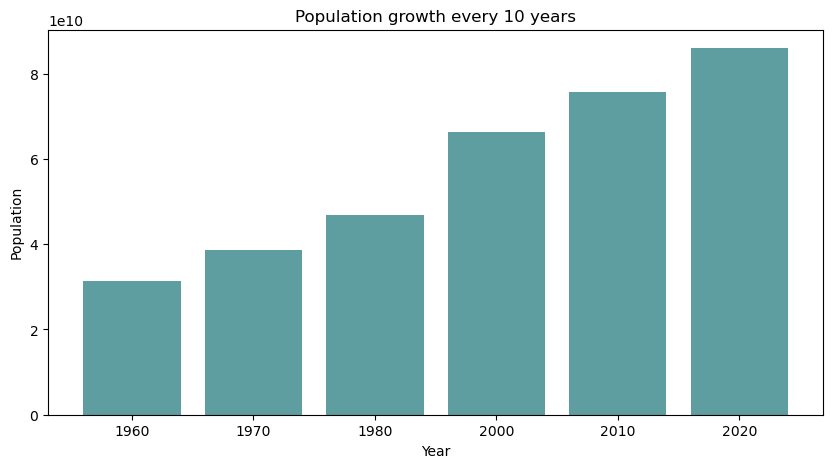

In [71]:
data = ['1960','1970','1980','2000','2010','2020']
# Calculate the total values for each year
total = df[data].sum()
plt.rcParams['figure.figsize']=(10,5)
plt.bar(data, total ,color = 'CadetBlue')
plt.ylabel('Population')
plt.xlabel('Year')
plt.title('Population growth every 10 years')
plt.show()

# visualize the population of countries for a specific year ( 2020)

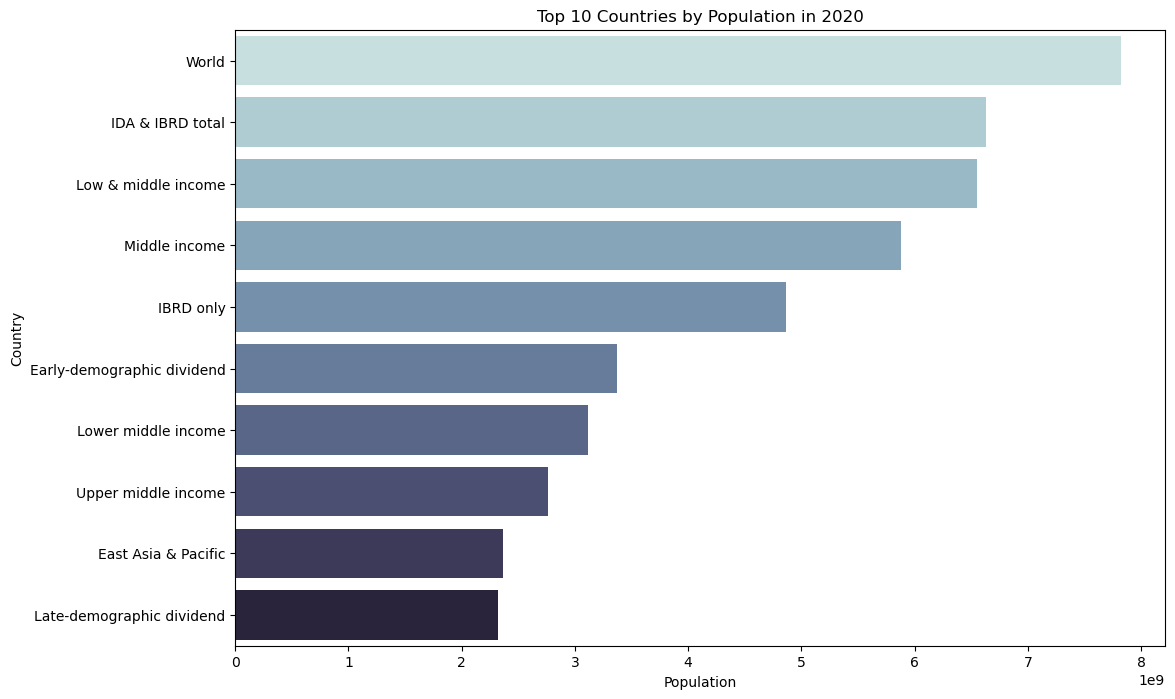

In [70]:
# Sort by population for better visualization  
df_sorted = df[['Country Name', '2020']].sort_values(by='2020',ascending=False).head(10)
# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='2020', y='Country Name', data=df_sorted, palette='ch:start=.2,rot=-.3')
plt.xlabel('Population')
plt.ylabel('Country')
plt.title(f'Top 10 Countries by Population in 2020')
plt.show()

## insight : 
## the greatest population county is IDA&IBRD

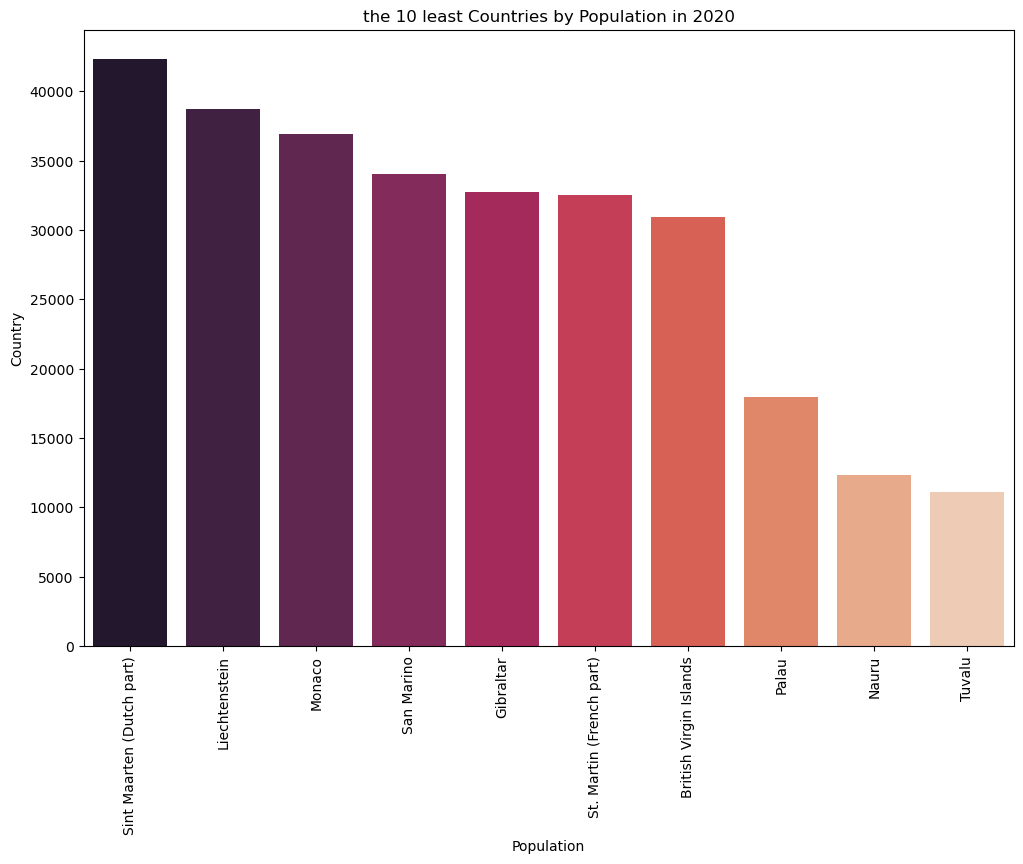

In [60]:
# Sort by population for better visualization
df_sorted = df[['Country Name', '2020']].sort_values(by='2020',ascending=False).tail(10)  

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(y='2020', x='Country Name', data=df_sorted, palette='rocket')
plt.xlabel('Population')
plt.ylabel('Country')
plt.title(f'the 10 least Countries by Population in 2020')
plt.xticks(rotation=90)
plt.show()

## insight : 
## the least population county is Tuvalu